# Tutorial - Stable Baselines

## Índice

- [O que é Stable Baselines?](#O-que-é-Stable-Baselines?)
- [Como usar Stable Baselines?](#Como-usar-Stable-Baselines?)
  - [Importando o Gym](#Importando-o-Gym)
  - [Como Funciona um Ambiente do Gym?](#Como-Funciona-um-Ambiente-do-Gym?)
  - [Criando um Ambiente](#Criando-um-Ambiente)
  - [Criando um Agente](#Criando-um-Agente)
  - [Rodando um Episódio](#Rodando-um-Episódio)
  - [Avaliando o Agente](#Avaliando-o-Agente)
  - [Treinamento](#Treinamento)
  - [Monitorando o Treinamento](#Monitorando-o-Treinamento)
  - [Customizando a Rede Neural](#Customizando-a-Rede-Neural)

## O que é Stable Baselines?

A **[Stable Baselines](https://github.com/hill-a/stable-baselines)** é uma biblioteca de Aprendizado por Reforço que implementa diversos algoritmos de agentes de RL, além de várias funcionalidades úteis para o treinamento de um agente. Suas implementações são bem simples e intuitivas, mas sem deixarem de ser otimizadas e poderosas, buscando facilitar o desenvolvimento de projetos de reforço de alta qualidade.

![Logo](https://github.com/hill-a/stable-baselines/raw/master/docs//_static/img/logo.png "Logo da Stable Baselines")

## Como usar Stable Baselines?

Com Stable Baselines, o processo de criar e treinar um agente é bem simples. Entretanto, caso você não saiba muito de Aprendizado por Reforço, é primeiro preciso passar por alguns conhecimentos básicos.

### Importando o Gym

O **[Gym](https://gym.openai.com/)** é uma biblioteca desenvolvida pela OpenAI que contém várias implementações prontas de ambientes de Aprendizado por Reforço. Ela é muito utilizada quando se quer testar um algoritmo de agente sem ter o trabalho de programar seu próprio ambiente.

<img src="https://user-images.githubusercontent.com/10624937/42135602-b0335606-7d12-11e8-8689-dd1cf9fa11a9.gif" alt="Exemplos de Ambientes do Gym" class="inline"/>
<figcaption>Exemplo de Ambientes do Gym</figcaption>
<br>

Para se ter acesso a esses ambientes, basta importar o Gym da seguinte forma:

In [159]:
import gymnasium as gym

### Como Funciona um Ambiente do Gym?

Agora que você já sabe o que é um ambiente, é preciso entender como nosso agente interage efetivamente com ele. Todos os ambientes do Gym possuem alguns métodos simples para facilitar a comunicação com eles:

<br>

| Método               | Funcionalidade                                          |
| :------------------- |:------------------------------------------------------- |
| `reset()`              | Inicializa o ambiente e recebe a observação inicial     |
| `step(action)  `       | Executa uma ação e recebe a observação e a recompensa   |
| `render() `            | Renderiza o ambiente                                    |
| `close()`              | Fecha o ambiente                                        |

<br>

Assim, o código para interagir com o ambiente costuma seguir o seguinte modelo:

---

```python
ambiente = gym.make("Nome do Ambiente")                         # Cria o ambiente
observação = ambiente.reset()                                   # Inicializa o ambiente
acabou = False

while not acabou:
    ambiente.render()                                           # Renderiza o ambiente
    observação, recompensa, acabou, info = ambiente.step(ação)  # Executa uma ação
    
ambiente.close()                                                # Fecha o ambiente
```

---

### Criando um Ambiente

Para utilizar um dos ambientes do Gym, nós utilizamos a função ```gym.make()```, passando o nome do ambiente desejado como parâmetro e guardando seu valor retornado em uma variável que chamaramos de ```env```. A lista com todos os ambiente pode ser encontrada [aqui](https://gym.openai.com/envs/#classic_control).

In [160]:
env = gym.make("CartPole-v1")
#env.seed(0)

Nesse caso, nós vamos utilizar o ambiente ```CartPole-v1```, um ambiente bem simples que modela um pêndulo invertido em cima de um carrinho buscando seu estado de equilíbrio.

<img src="https://miro.medium.com/max/1200/1*jLj9SYWI7e6RElIsI3DFjg.gif" width="400px" alt="Ambiente do CartPole-v1" class="inline"/>

#### CartPole

Antes de treinar qualquer agente, primeiro é preciso entender melhor quais as características do nosso ambiente.

O **Espaço de Observação** do CartPole é definido por 4 informações:

<br>

|     | Informação                         | Min     | Max    |
| :-- | :--------------------------------- | :-----: | :----: |
| 0   | Posição do Carrinho                | -4.8    | 4.8    |
| 1   | Velocidade do Carrinho             | -Inf    | Inf    |
| 2   | Ângulo da Barra                    | -24 deg | 24 deg |
| 3   | Velocidade na Extremidade da Barra | -Inf    | Inf    |

<br>

Dessa forma, a cada instante recebemos uma lista da observação com o seguinte formato:

In [161]:
print(env.observation_space.sample())

[ 1.0452226   1.0658826   0.11031199 -1.0653038 ]


Já o **Espaço de Ação** é composto por duas ações únicas: mover o carrinho para a **esquerda** ou para a **direita**.

Quando queremos mover o carrinho para a esquerda, fazemos um `env.step(0)`; quando queremos movê-lo para a direita, enviamos um `env.step(1)`

In [162]:
print(env.action_space.sample())

1


### Criando um Agente

Depois de escolhermos nosso ambiente, já podemos pensar em qual algoritmo de agente queremos usar.

A biblioteca disponibiliza algoritmos de diversos tipos, como *Deep Q-Networks* e *Actor-Critics*. Nem todos eles suportam todos os tipos de ambientes, então é recomendável dar uma olhada na [página oficial dos algoritmos](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html).

#### Inicialização

Todos os algoritmos são inicializados de uma forma parecida, nós instanciamos eles com alguns parâmetros em comum: ```policy```, que define a arquitetura da rede neural e ```env```, que define o ambiente no qual o agente vai treinar. Assim, a inicialização segue o seguinte formato:

```python
agente = ALGORITMO(policy, env)
```

Como exemplo, vamos criar um **PPO**, um tipo de Actor-Critic, para resolver o ambiente do **CartPole**:

In [163]:
from stable_baselines3 import PPO

model = PPO("MlpPolicy", env, seed=1, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Inicializamos o PPO com a `policy` "MlpPolicy", que cria uma rede neural artificial com 2 camadas ocultas de 64 neurônios cada, no `env` do CartPole.

Todos os agentes também possuem alguns métodos em comuns bem importantes de se conhecer:

<br>

| Método        | Funcionalidade                          |
| :------------ |:--------------------------------------- |
| `learn()`       | Treina o agente                         |
| `predict(obs)`  | Escolhe uma ação com base na observação |
| `save(caminho)` | Salve o agente                          |
| `load(caminho)` | Carrega o agente                        |

<br>

Dessa forma, se quisermos escolher a próxima ação do nosso agente, nós rodamos:

```python
agente.predict(observação)
```

### Rodando um Episódio

Bom, agora que já temos nosso agente e nosso ambiente, já podemos rodar nosso primeiro episódio!

Para isso, vamos criar uma função `run_episode` para simplificar o processo:

In [164]:
import itertools
import numpy as np

# A função recebe o ambiente e o agente como parâmetros
def run_episode(env, model, render=False):
    # Primeiro, inicializamos o ambiente e guardamos a observação inicial em 'obs'
    obs, info= env.reset(seed=0)
    
    # Loop do episódio
    for t in itertools.count():
        # Nosso modelo prediz a ação 'action' a ser tomada com base na nossa observação 'obs'
        action, _states = model.predict(obs)
        model.predict(obs)
        # Tomamos a ação 'action', e recebemos uma nova observação 'obs', uma recompensa 'reward'
        # e se o episódio terminou 'done'
        obs, reward, terminated, done, info = env.step(action)
        
        # Renderiza o ambiente, caso desejado
        if render:
            env.render()
            
        # Finaliza o episódio, caso tenha terminado
        if done:
            break
    
    # Quando terminado, fechamos o ambiente
    env.close()
    
    # Imprimindo a duração do ambiente
    print("Duração do Episódio: " + str(t+1))

Pronto, já podemos rodar o nosso agente!

In [165]:
run_episode(env, model, render=True)

Duração do Episódio: 500


Provavelmente o resultado não foi tão bom assim. Isso é porque precisamos treinar nosso agente para que ele saiba as melhores ações a se tomar.

### Avaliando o Agente

Para melhor avaliar o desempenho do nosso agente, podemos utilizar a função `evaluate_policy` da biblioteca, que roda uma quantidade determinável de episódios e retorna a recompensa média obtida.

In [166]:
from stable_baselines3.common.evaluation import evaluate_policy

# Ambiente separado para avaliação
eval_env = gym.make("CartPole-v1")

# Avaliando o agente
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=25, deterministic=True)

print(f"Recompensa Média: {mean_reward:.2f} +/- {std_reward}")

Recompensa Média: 9.36 +/- 0.7418894796396563


c:\Users\gusta\.conda\envs\base39\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


### Treinamento

O treinamento do agente acontece de maneira bem simples, basta rodar o método `.learn()` com a quantidade de instantes de tempo `total_timesteps` que desejamos treinar.

Ao longo do treinamento, nosso agente vai mostrando algumas informações importantes no ouput, como a função de custo `loss`.

In [167]:
model.learn(total_timesteps=25000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | 23       |
| time/              |          |
|    fps             | 1030     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.9        |
|    ep_rew_mean          | 26.9        |
| time/                   |             |
|    fps                  | 751         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009331922 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.000603   |
|    learning_rate        | 0.

Agora que já treinamos o nosso agente, podemos rodar mais um episódio para ver como ele melhorou:

In [168]:
run_episode(env, model, render=True)

Duração do Episódio: 500


Para melhor avaliar nosso desempenho em múltiplos episódios, vamos rodar novamente a função `evaluate_policy`:

In [169]:
from stable_baselines3.common.evaluation import evaluate_policy

# Avaliando o agente
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=25, deterministic=True)

print(f"Recompensa Média: {mean_reward:.2f} +/- {std_reward}")

Recompensa Média: 500.00 +/- 0.0


Parabéns, você acabou de criar o seu primeiro agente com a Stable Baselines!

Esse conhecimento já é suficiente para aplicar em vários ambientes simples, mas ainda existem várias outras funcionalidades muito interessantes da biblioteca que valem a pena aprender.

### Monitorando o Treinamento

Para obter mais informações do treinamento, podemos utilizar o *wrapper* `Monitor` da biblioteca para monitorar o desempenho do nosso agente mesmo durante o treino.

Para isto, primeiro devemos criar uma pasta de logs:

In [170]:
import os

# Cria um diretório de logs
log_dir = "./logs/"
os.makedirs(log_dir, exist_ok=True)

Em seguida, criamos o nosso ambiente e passamos ele para o nosso *wrapper*:

In [171]:
from stable_baselines3.common.monitor import Monitor

# Cria o ambiente
env = gym.make("CartPole-v1")

# Encapsula ele no wrapper Monitor
env = Monitor(env, log_dir)

A partir daí, basta treinar o nosso agente como normal, utilizando o nosso novo ambiente encapsulado pelo *wrapper*:

In [172]:
model = PPO("MlpPolicy", env, seed=1, verbose=1).learn(total_timesteps=40000)

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | 21.4     |
| time/              |          |
|    fps             | 533      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 26.9       |
|    ep_rew_mean          | 26.9       |
| time/                   |            |
|    fps                  | 358        |
|    iterations           | 2          |
|    time_elapsed         | 11         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00932843 |
|    clip_fraction        | 0.0985     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.686     |
|    explained_variance   | 0.0012

Terminado o treinamento, podemos plotar os resultados utilizando o `result_plotter`:

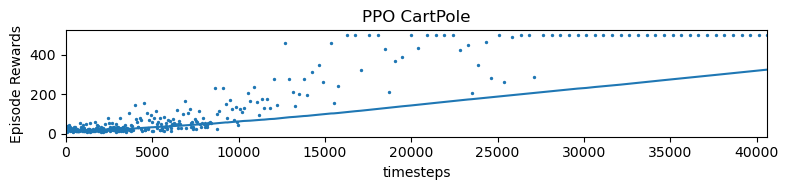

In [173]:
from stable_baselines3.common import results_plotter

# Helper from the library
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "PPO CartPole")

Pronto! Agora temos uma visualização da performance do nosso agente durante o seu treinamento. Entretanto, podemos criar a nossa própria função de visualização para melhor analisar o modelo:

In [174]:
import matplotlib.pyplot as plt

def plot_results(log_folder, window=10, title="Curva de Aprendizado"):
    """
    Plota os resultados.

    :param log_folder: (str) diretório dos resultados a serem plotados
    :param window: (int) tamanho da janela da média móvel
    :param title: (str) título do plot
    """
    # Obtém os resultados
    results = results_plotter.load_results(log_folder)
    x, y = results_plotter.ts2xy(results, "timesteps")
    
    # Calcula a média móvel do retorno
    y_smoothed = results_plotter.rolling_window(y, window=window).mean(axis=1)
    
    # Plota os resultados
    fig = plt.figure(title, figsize=(10, 5))
    plt.scatter(x, y, s=2)
    plt.plot(x[window-1:], y_smoothed, color="darkblue", label="Média Móvel")
    plt.xlabel("Timesteps")
    plt.ylabel("Retorno Médio")
    plt.title(title)
    plt.legend()
    plt.show()

Agora conseguimos visualizar melhor o treinamento:

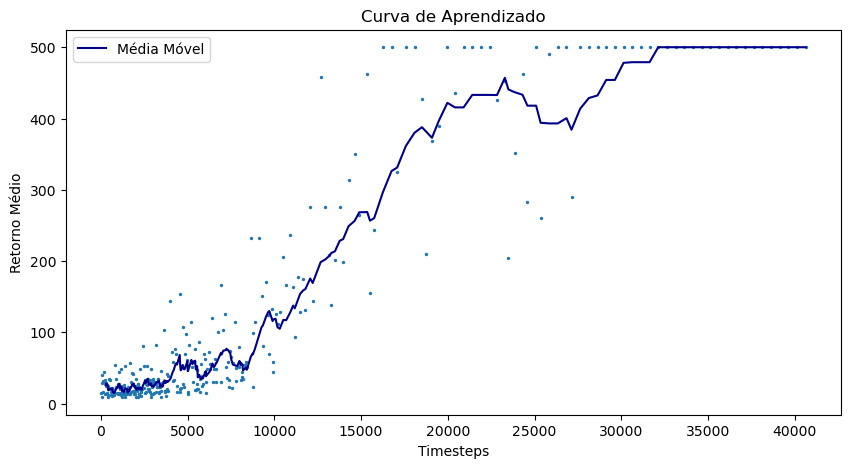

In [175]:
plot_results(log_dir)

### Customizando a Rede Neural

Se quisermos mais controle a respeito da arquitetura do nosso modelo, podemos modificar o parâmetro `policy_kwargs` para customizar a nossa rede neural. Por exemplo, podemos alterar:

 - `activation_fn`: a função de ativação da rede, como `torch.nn.Tanh` ou `torch.nn.ReLU`.
 - `net_arch`: a quantidade de camadas e neurônios da rede. Um Actor-Critic com duas redes de duas camadas de 32 neurônios teria uma arquitetura `[dict(pi=[32, 32], vf=[32, 32])]`, por exemplo.

In [176]:
import torch

# Cria o ambiente com o wrapper Monitor
env = Monitor(gym.make("CartPole-v1"), log_dir)

# Parâmetros das redes neurais
policy_kwargs = dict(activation_fn=torch.nn.ReLU,                # Troca a função de ativação para ReLU
                     net_arch=[dict(pi=[32, 32], vf=[32, 32])])  # Define a arquitetura das redes do Actor-Critic

# Cria o nosso modelo com os novos parâmetros
model = PPO("MlpPolicy", env, seed=1, verbose=1, policy_kwargs=policy_kwargs).learn(total_timesteps=40000)

Using cpu device
Wrapping the env in a DummyVecEnv.


c:\Users\gusta\.conda\envs\base39\lib\site-packages\stable_baselines3\common\policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | 23.4     |
| time/              |          |
|    fps             | 1208     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 26.4         |
|    ep_rew_mean          | 26.4         |
| time/                   |              |
|    fps                  | 712          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0091326935 |
|    clip_fraction        | 0.0453       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.689       |
|    explained_variance   | 0.0258       |
|    learning_r

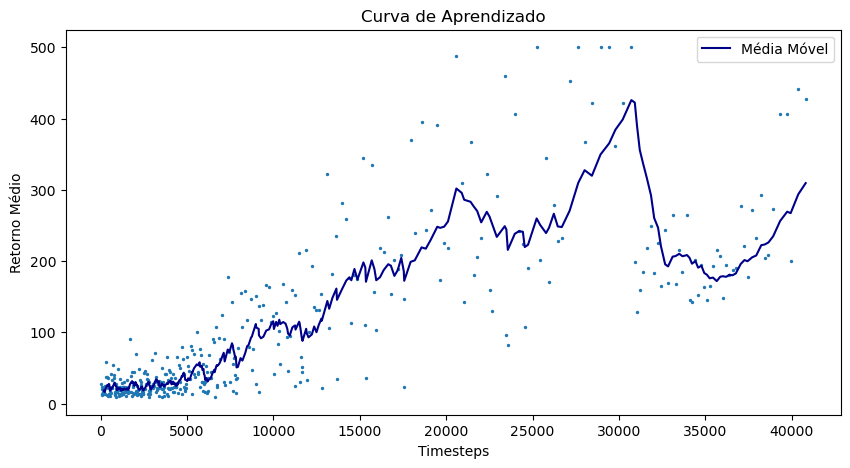

In [177]:
plot_results(log_dir)